## Observations and Insights 

Three observations or insights about the data
1. The ratio of the genders of the mouse are nearly identical, with males being 50.2% and females being 49.8%
2. The Mouse ID c326 is the outlier in the boxplot under regimen Infubinol
3. The regimens Infubinol and Ceftamin have similar Median Tumor Volumes. 

In [251]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
merge_data_df = merge_data_df.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume'})

# Display the data table for preview
merge_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [235]:
# Checking the number of mice.
len(merge_data_df["Mouse ID"].unique())

249

In [236]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mouse_time = merge_data_df[merge_data_df.duplicated(["Mouse ID","Timepoint"])]
dupe_mouse_time["Mouse ID"].unique()

array(['g989'], dtype=object)

In [237]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouse_time

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [238]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = merge_data_df.drop_duplicates(subset=["Mouse ID","Timepoint"], keep="first")

In [239]:
# Checking the number of mice in the clean DataFrame.
len(clean_data_df["Mouse ID"].unique())

249

## Summary Statistics

In [240]:
mean = merge_data_df.groupby('Drug Regimen')['Tumor Volume'].mean()
median = merge_data_df.groupby('Drug Regimen')['Tumor Volume'].median()
variance = merge_data_df.groupby('Drug Regimen')['Tumor Volume'].var()
standv = merge_data_df.groupby('Drug Regimen')['Tumor Volume'].std()
SEM = merge_data_df.groupby('Drug Regimen')['Tumor Volume'].sem()
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standv, 
                          "SEM": SEM})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [241]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0, 0.5, 'Timepoints')

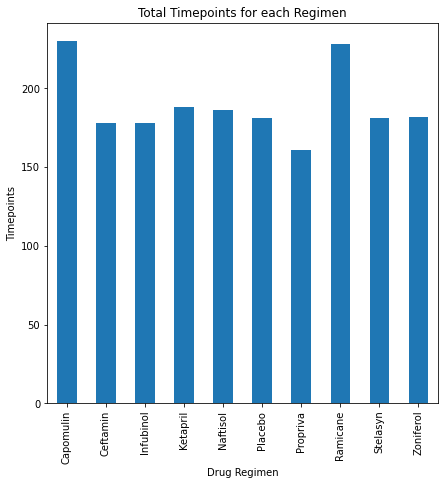

In [242]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen_total = merge_data_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

#Creating Chart
drug_regimen_total.plot(kind="bar", figsize=(7,7))

#set chart title
plt.title("Total Timepoints for each Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")

Text(0, 0.5, 'Timepoints')

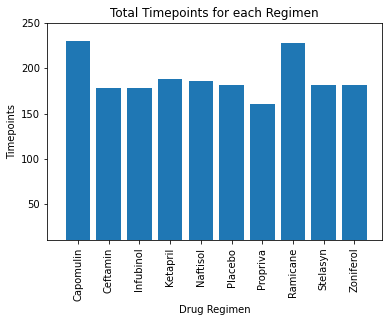

In [243]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

data_time = merge_data_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

x_axis = np.arange(len(drug_regimen_total))

plt.bar(x_axis, data_time, alpha=1, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-1, len(x_axis)-0.1)
plt.ylim(10, max(data_time)+20)

plt.title("Total Timepoints for each Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")

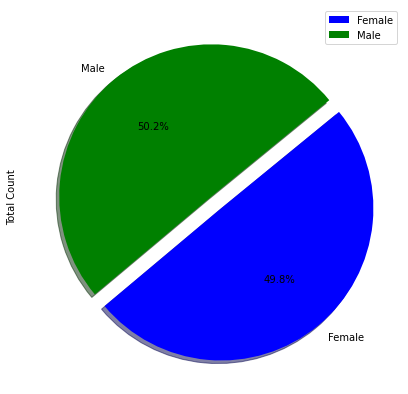

In [244]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_sort = merge_data_df.groupby(["Mouse ID","Sex"])
gender_df = pd.DataFrame(gender_sort.size())

mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

colors = ['blue', 'green']

plot = mouse_gender.plot.pie(y='Total Count',figsize=(7,7), colors = colors, startangle=220, explode = explode, shadow = True, autopct="%1.1f%%")

(-1.1124415331686939,
 1.1892364142814558,
 -1.202001480237823,
 1.1132985915525087)

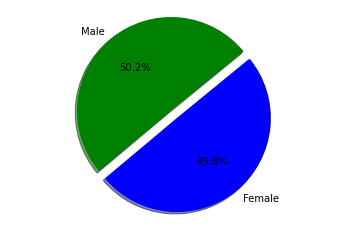

In [245]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

Gender = ["Female","Male"]
sizes = [49.8,50.2]
colors = ['blue', 'green']

plt.pie(sizes, explode=explode, labels=Gender, colors=colors, autopct="%1.1f%%", shadow=True, startangle=220)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [246]:
tumor_volume = merge_data_df[merge_data_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
tumor_volume = tumor_volume.sort_values(["Timepoint"], ascending=True)
tumor_volume_data = best_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume"]]
tumor_volume_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [247]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

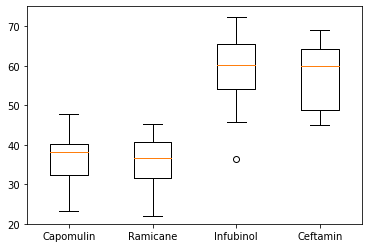

In [248]:
final_tumor = tumor_volume_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume']
tumor_regimens = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
tumor_lists = final_tumor_df.groupby('Drug Regimen')['Tumor Volume'].apply(list)
plt.boxplot(tumor_vols, labels=tumor_regimens)
plt.ylim(20, 75)
plt.show()

## Line and Scatter Plots

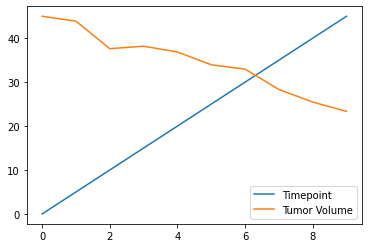

In [249]:
tumor_time = merge_data_df[merge_data_df["Mouse ID"].isin(["s185"])]
tumor_time_df = tumor_time[["Mouse ID", "Timepoint", "Tumor Volume"]]
line_plot_df = tumor_time_df.reset_index()
line_plot = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume"]]
lines = line_plot.plot.line()

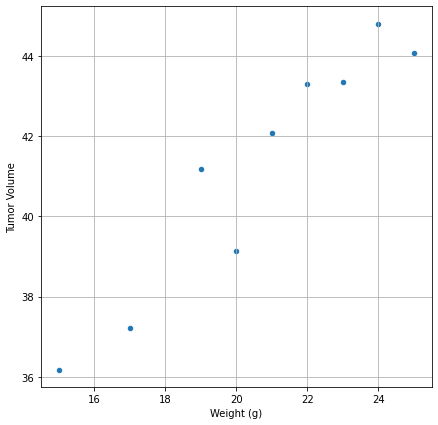

In [250]:
tumor_weight = merge_data_df[merge_data_df["Drug Regimen"].isin(["Capomulin"])]
scatter_df = tumor_volume[["Mouse ID","Weight (g)", "Tumor Volume"]]
scatter_capomulin_plot = tumor_weight.reset_index()
tumor_weight_plot = scatter_capomulin_plot.groupby("Weight (g)")["Tumor Volume"].mean()
tumor_scatter = pd.DataFrame(tumor_weight_plot).reset_index()
scatter_plot = tumor_scatter.plot(kind='scatter', x='Weight (g)', y='Tumor Volume', grid = True, figsize= (7,7))

## Correlation and Regression